In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# to avoid warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("medical_insurance-Copy1.xlsx")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.select_dtypes(include="float")

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [8]:
df.select_dtypes(include="int")

,age,children
0,19,0
1,18,1
2,28,3
3,33,0
4,32,0
...,...,...
1333,50,3
1334,18,0
1335,18,0
1336,21,0


In [9]:
df_obj=df.select_dtypes(include="object")
df_obj

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [10]:
len(df_obj.columns)

3

In [11]:
l1=df.describe().columns
l1

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [12]:
len(l1)

4

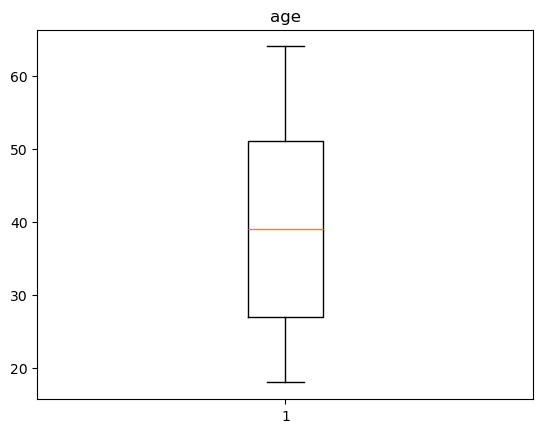

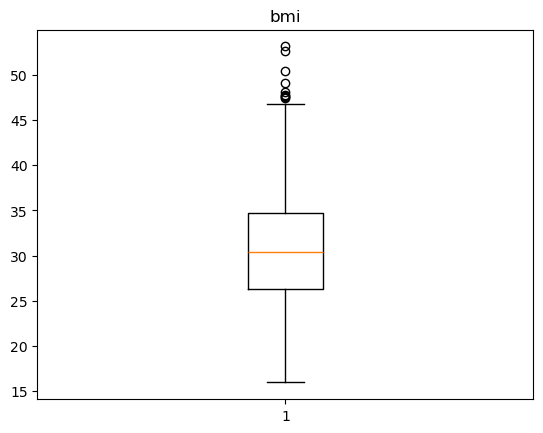

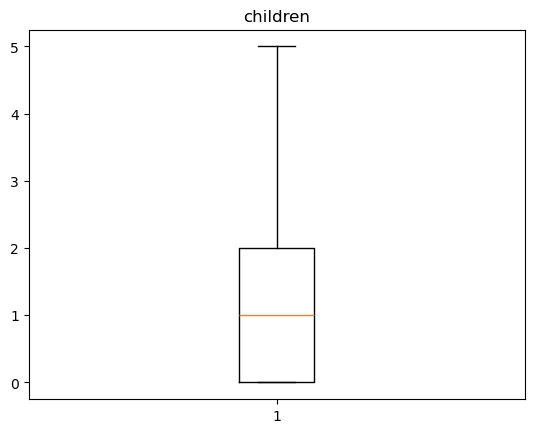

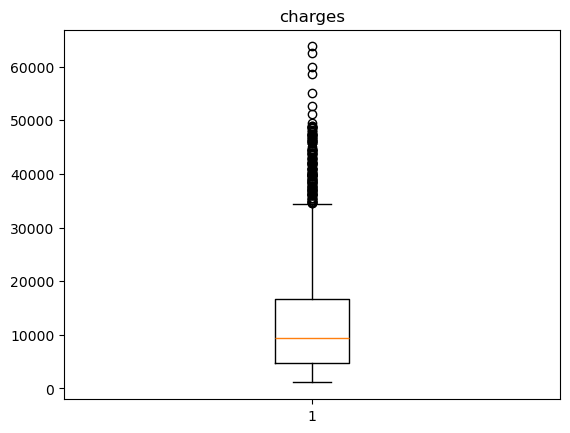

In [13]:
for i in l1:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [14]:
# bmi

q1=df["bmi"].quantile(0.25)
q3=df["bmi"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_taila",lb)

q1 26.29625
q3 34.69375
iqr 8.3975
upper_tail 47.290000000000006
lower_taila 13.7


In [15]:
df.loc[df["bmi"]>ub]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [16]:
df.loc[df["bmi"]>ub,"bmi"]=ub

In [17]:
df.loc[df["bmi"]>ub]

,age,sex,bmi,children,smoker,region,charges


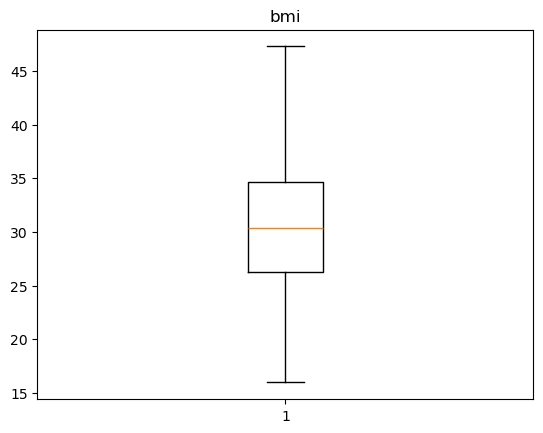

In [18]:
plt.boxplot(x=df['bmi'])
plt.title('bmi')
plt.show()

In [19]:
df_obj=df.select_dtypes(include="object")
df_obj

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [20]:
q1=df_obj.columns
q1

Index(['sex', 'smoker', 'region'], dtype='object')

In [21]:
df_obj["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [22]:
for i in q1:
    print(df_obj[i].value_counts())
    print("*"*100)

sex
male      676
female    662
Name: count, dtype: int64
****************************************************************************************************
smoker
no     1064
yes     274
Name: count, dtype: int64
****************************************************************************************************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
****************************************************************************************************


In [23]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
q1=df_obj.columns
q1

Index(['sex', 'smoker', 'region'], dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()

In [26]:
df_obj['sex']=a.fit_transform(df_obj['sex'])
df_obj['smoker']=a.fit_transform(df_obj['smoker'])

In [27]:
df_obj

,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest
...,...,...,...
1333,1,0,northwest
1334,0,0,northeast
1335,0,0,southeast
1336,0,0,southwest


In [28]:
df_obj=pd.get_dummies(df_obj,columns=["region"]).astype(int)

In [29]:
df_obj

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
1333,1,0,0,1,0,0
1334,0,0,1,0,0,0
1335,0,0,0,0,1,0
1336,0,0,0,0,0,1


In [30]:
df_num=df.select_dtypes(exclude=object)
df_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [31]:
from sklearn.preprocessing import MinMaxScaler
q=MinMaxScaler()

In [32]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
w=df_num.columns
w

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [34]:
for i in w:
    df_num[i]=q.fit_transform(df_num[[i]])

In [35]:
df_num

,age,bmi,children,charges
0,0.021739,0.381104,0.0,0.251611
1,0.000000,0.568465,0.2,0.009636
2,0.217391,0.543888,0.6,0.053115
3,0.326087,0.215289,0.0,0.333010
4,0.304348,0.412384,0.0,0.043816
...,...,...,...,...
1333,0.695652,0.479094,0.6,0.151299
1334,0.000000,0.509416,0.0,0.017305
1335,0.000000,0.666773,0.0,0.008108
1336,0.065217,0.314076,0.0,0.014144


In [36]:
from scipy.stats import skew

In [37]:
w

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [38]:
for i in w:
    print(i,skew(df_num[i]))
    print("*"*100)

age 0.05561008307259972
****************************************************************************************************
bmi 0.23224581958435403
****************************************************************************************************
children 0.937328116387443
****************************************************************************************************
charges 1.514179711874575
****************************************************************************************************


In [39]:
new_df=pd.concat([df_obj,df_num],axis=1)
new_df

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,0,1,0.021739,0.381104,0.0,0.251611
1,1,0,0,0,1,0,0.000000,0.568465,0.2,0.009636
2,1,0,0,0,1,0,0.217391,0.543888,0.6,0.053115
3,1,0,0,1,0,0,0.326087,0.215289,0.0,0.333010
4,1,0,0,1,0,0,0.304348,0.412384,0.0,0.043816
...,...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,0,0,0.695652,0.479094,0.6,0.151299
1334,0,0,1,0,0,0,0.000000,0.509416,0.0,0.017305
1335,0,0,0,0,1,0,0.000000,0.666773,0.0,0.008108
1336,0,0,0,0,0,1,0.065217,0.314076,0.0,0.014144


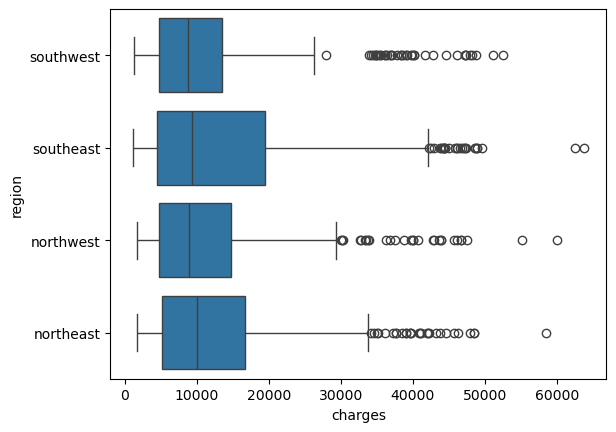

In [40]:
# removing the charges column outliers.

sns.boxplot(data=df,x=df["charges"],y=df["region"])
plt.show()

In [41]:
df[(df["region"]=="southwest")&(df["charges"]>26000)]

,age,sex,bmi,children,smoker,region,charges
19,30,male,35.30,0,yes,southwest,36837.46700
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
39,60,male,39.90,0,yes,southwest,48173.36100
84,37,female,34.80,2,yes,southwest,39836.51900
94,64,female,31.30,2,yes,southwest,47291.05500
175,63,female,37.70,0,yes,southwest,48824.45000
223,19,male,34.80,0,yes,southwest,34779.61500
242,55,female,26.80,1,no,southwest,35160.13457


In [42]:
df.loc[(df["region"]=="southwest")&(df["charges"]>26000),"charges"]=26000

In [43]:
df.loc[(df["region"]=="southwest")&(df["charges"]>26000)]

,age,sex,bmi,children,smoker,region,charges


In [44]:
df.loc[(df["region"]=="southeast")&(df["charges"]>42000)]

,age,sex,bmi,children,smoker,region,charges
109,63,male,35.09,0,yes,southeast,47055.53210
252,54,male,34.21,2,yes,southeast,44260.74990
265,46,male,42.35,3,yes,southeast,46151.12450
292,25,male,45.54,2,yes,southeast,42112.23560
312,43,male,35.97,3,yes,southeast,42124.51530
420,64,male,33.88,0,yes,southeast,46889.26120
421,61,male,35.86,0,yes,southeast,46599.10840
488,44,female,38.06,0,yes,southeast,48885.13561
530,57,male,42.13,1,yes,southeast,48675.51770
543,54,female,47.29,0,yes,southeast,63770.42801


In [45]:
df.loc[(df["region"]=="southeast")&(df["charges"]>42000),"charges"]=42000

In [46]:
df.loc[(df["region"]=="southeast")&(df["charges"]>42000)]

,age,sex,bmi,children,smoker,region,charges


In [47]:
df.loc[(df["region"]=="northwest")&(df["charges"]>28000)]

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
55,58,male,36.955,2,yes,northwest,47496.49445
62,64,male,24.700,1,no,northwest,30166.61817
86,57,female,31.160,0,yes,northwest,43578.93940
128,32,female,17.765,2,yes,northwest,32734.18630
146,46,male,30.495,3,yes,northwest,40720.55105
256,56,male,33.630,0,yes,northwest,43921.18370
259,19,male,31.920,0,yes,northwest,33750.29180
263,19,male,36.955,0,yes,northwest,36219.40545
298,31,male,34.390,3,yes,northwest,38746.35510


In [48]:
df.loc[(df["region"]=="northwest")&(df["charges"]>28000),"charges"]=28000

In [49]:
df.loc[(df["region"]=="northwest")&(df["charges"]>28000)]

,age,sex,bmi,children,smoker,region,charges


In [50]:
df.loc[(df["region"]=="northeast")&(df["charges"]>33000)]

,age,sex,bmi,children,smoker,region,charges
23,34,female,31.920,1,yes,northeast,37701.87680
38,35,male,36.670,1,yes,northeast,39774.27630
123,44,male,31.350,1,yes,northeast,39556.49450
185,36,male,41.895,3,yes,northeast,43753.33705
240,23,female,36.670,2,yes,northeast,38511.62830
254,50,male,31.825,0,yes,northeast,41097.16175
281,54,male,40.565,3,yes,northeast,48549.17835
288,59,female,36.765,1,yes,northeast,47896.79135
330,61,female,36.385,1,yes,northeast,48517.56315
338,50,male,32.300,1,yes,northeast,41919.09700


In [51]:
df.loc[(df["region"]=="northeast")&(df["charges"]>33000),"charges"]=33000

In [52]:
df.loc[(df["region"]=="northeast")&(df["charges"]>33000)]

,age,sex,bmi,children,smoker,region,charges


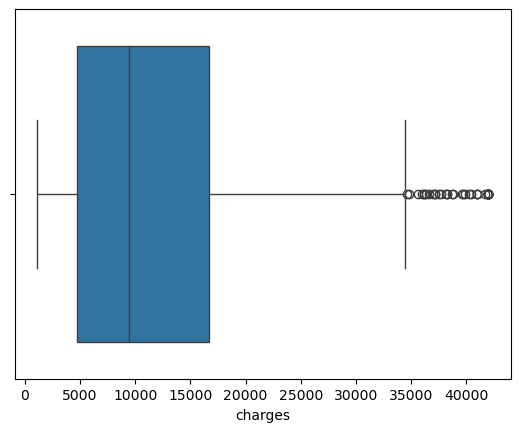

In [53]:
sns.boxplot(data=df,x=df["charges"])
plt.show()

In [54]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
new_df.corr().tail(1)

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
charges,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.04321,0.299008,0.198997,0.067998,1.0


<Axes: >

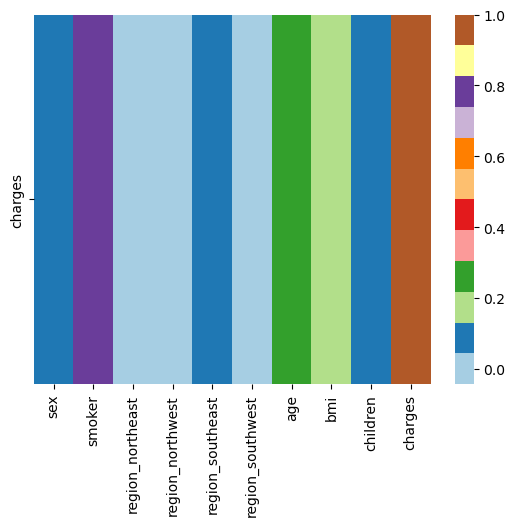

In [56]:
sns.heatmap(new_df.corr().tail(1),cmap="Paired")

In [57]:
x=new_df.drop("charges",axis=1)   
y=new_df["charges"]


In [58]:
x                              # features means indepent variable

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0,1,0,0,0,1,0.021739,0.381104,0.0
1,1,0,0,0,1,0,0.000000,0.568465,0.2
2,1,0,0,0,1,0,0.217391,0.543888,0.6
3,1,0,0,1,0,0,0.326087,0.215289,0.0
4,1,0,0,1,0,0,0.304348,0.412384,0.0
...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,0,0,0.695652,0.479094,0.6
1334,0,0,1,0,0,0,0.000000,0.509416,0.0
1335,0,0,0,0,1,0,0.000000,0.666773,0.0
1336,0,0,0,0,0,1,0.065217,0.314076,0.0


In [59]:
y                                     # here will target columns

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

# Model Building

In [61]:
# Model Building

from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=9)   # test_size=0.2,0.3 by default it will be 0.2 it means siganificance level   
x_train

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
333,0,0,1,0,0,0,0.826087,0.409352,0.0
644,1,0,0,0,1,0,0.543478,0.617619,0.4
1134,1,0,0,1,0,0,0.217391,0.570061,0.0
852,0,1,1,0,0,0,0.608696,0.624641,0.0
514,1,1,0,0,0,1,0.456522,0.393872,0.2
...,...,...,...,...,...,...,...,...,...
56,0,0,1,0,0,0,0.869565,0.506384,0.4
501,1,0,1,0,0,0,0.543478,0.321417,0.0
638,1,1,1,0,0,0,0.456522,0.333546,0.0
348,0,0,0,0,1,0,0.391304,0.445579,0.2


In [63]:
x_test

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
227,0,0,0,0,1,0,0.869565,0.828280,0.0
1235,1,0,0,1,0,0,0.173913,0.482126,0.0
985,0,0,0,0,0,1,0.565217,0.314076,0.2
326,0,0,0,0,1,0,0.195652,0.231408,0.2
352,0,0,0,0,0,1,0.260870,0.374721,0.0
...,...,...,...,...,...,...,...,...,...
81,0,0,1,0,0,0,0.586957,0.712576,0.0
1152,0,1,0,0,1,0,0.543478,0.529844,0.6
200,0,0,0,1,0,0,0.021739,0.515480,0.0
228,0,0,1,0,0,0,0.500000,0.500319,0.2


In [64]:
y_train

333     0.168184
644     0.282277
1134    0.296120
852     0.654282
514     0.318607
          ...   
56      0.199294
501     0.091231
638     0.303717
348     0.069533
382     0.313808
Name: charges, Length: 1070, dtype: float64

In [65]:
y_test

227     0.368811
1235    0.025183
985     0.103797
326     0.038948
352     0.038825
          ...   
81      0.108756
1152    0.635600
200     0.016103
228     0.099544
422     0.606613
Name: charges, Length: 268, dtype: float64

In [114]:
# Liner regression Model call

from sklearn.linear_model import LinearRegression

In [116]:
# Evaluation Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [118]:
lr=LinearRegression()

In [120]:
model=lr.fit(x_train,y_train)

In [122]:
y_pred=model.predict(x_test)

In [124]:
residual=y_pred-y_test

In [126]:
residual

227    -0.219885
1235    0.040246
985     0.019249
326     0.042107
352     0.010491
          ...   
81      0.002572
1152   -0.065776
200     0.049327
228     0.022526
422    -0.051926
Name: charges, Length: 268, dtype: float64

In [128]:
model.intercept_  # intersecpt is only one.

-2948908521408.5938

In [130]:
model.coef_     # difference x value of m 

array([-2.27729109e+08,  5.68498268e+12,  4.30326866e+12,  1.09998573e+12,
        5.17503160e+12,  1.35381237e+12, -2.19698283e+12,  5.25647631e+11,
        3.00695564e+12,  9.34870497e+11, -6.48155007e+11,  2.02636719e-02,
       -5.03682767e+12, -5.03682767e+12, -5.03682767e+12, -5.03682767e+12,
        3.56445312e-02,  1.46484375e-02, -3.95507812e-02,  1.56068157e+12,
       -5.86395023e+12, -5.86395023e+12, -5.86395023e+12, -5.86395023e+12,
       -3.88183594e-02,  7.17041016e-01, -4.29687500e-02,  1.84915052e+12,
       -3.82621484e+11,  5.78707807e+10, -1.49751009e+11, -5.25647631e+11,
       -3.00695564e+12, -9.34870497e+11, -2.22589535e+12, -3.98007160e+11,
        1.94615150e+11, -5.25647631e+11, -3.00695564e+12, -9.34870497e+11,
        1.59532388e+12,  9.76562500e-04, -5.25647631e+11, -3.00695564e+12,
       -9.34870497e+11,  5.14611909e+12, -5.25647631e+11, -3.00695564e+12,
       -9.34870497e+11,  2.22656250e-01,  3.12500000e-02, -4.71191406e-02,
       -2.00073242e-01,  

In [140]:
# Model evulation of testing data

y_pred = model.predict(x_text)

mse = mean_squared_error(y_test,y_pred)

mean_absolute_error
mean_squared_error
r2_score

NameError: name 'x_text' is not defined

In [134]:
x

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0,1,0,0,0,1,0.021739,0.381104,0.0
1,1,0,0,0,1,0,0.000000,0.568465,0.2
2,1,0,0,0,1,0,0.217391,0.543888,0.6
3,1,0,0,1,0,0,0.326087,0.215289,0.0
4,1,0,0,1,0,0,0.304348,0.412384,0.0
...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,0,0,0.695652,0.479094,0.6
1334,0,0,1,0,0,0,0.000000,0.509416,0.0
1335,0,0,0,0,1,0,0.000000,0.666773,0.0
1336,0,0,0,0,0,1,0.065217,0.314076,0.0


In [136]:
a=x.columns

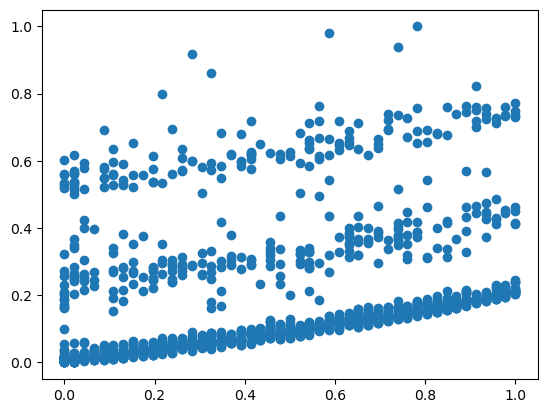

In [82]:
plt.scatter(x["age"],y)

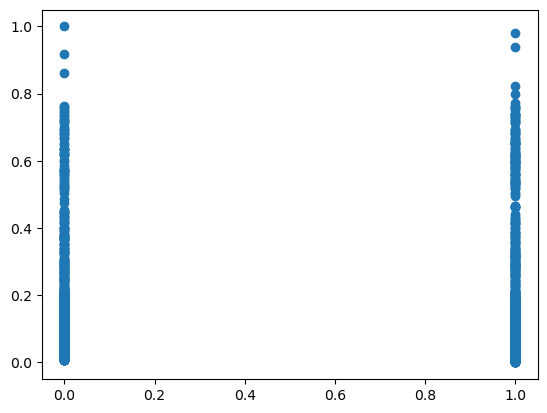

In [84]:
plt.scatter(x["sex"],y)

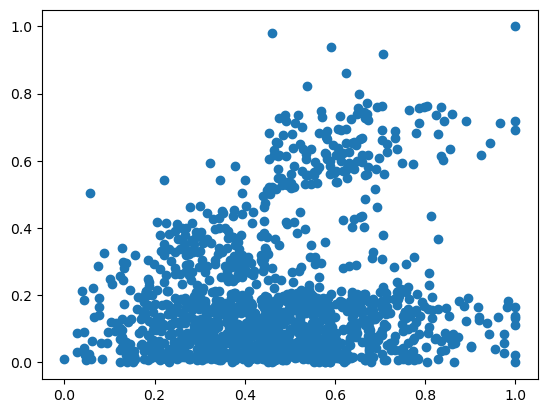

In [86]:
plt.scatter(x["bmi"],y)

In [88]:
model.score(x_test,y_test)

0.7776192731468816

In [90]:
model.score(x_train,y_train)

0.7442513432563054

In [92]:
from sklearn.preprocessing import PolynomialFeatures       # features : column    :-  to handle non learninty

In [94]:
pf=PolynomialFeatures(2)

In [96]:
x_train_new=pf.fit_transform(x_train)
x_test_new=pf.fit_transform(x_test)

In [98]:
x_new=pf.fit_transform(x)            #Polynomial features of x                            # log value of each records.

In [100]:
x_train,x_test, y_train,y_test = train_test_split(x_new,y, test_size=0.2,random_state=9)

In [102]:
lr=LinearRegression()

In [104]:
new_model=lr.fit(x_train_new,y_train)

In [106]:
y_pred=new_model.predict(x_test_new)

In [108]:
y_pred

array([ 0.14892578,  0.06542969,  0.12304688,  0.08105469,  0.04931641,
        0.16845703,  0.83984375,  0.15625   ,  0.03125   ,  0.19091797,
        0.04101562,  0.4375    ,  0.19580078,  0.37109375,  0.45019531,
        0.13720703,  0.06982422,  0.10058594,  0.12988281,  0.25878906,
        0.25292969,  0.20654297,  0.40820312,  0.15380859,  0.07324219,
        0.09179688,  0.07080078,  0.078125  ,  0.12060547,  0.50683594,
        0.06103516,  0.54882812,  0.19140625,  0.16210938,  0.55273438,
        0.21484375,  0.484375  , -0.0234375 ,  0.20458984,  0.10546875,
        0.10742188,  0.11816406,  0.12109375,  0.14160156,  0.10253906,
        0.02148438,  0.24267578,  0.02636719,  0.83789062,  0.07519531,
        0.06005859,  0.06103516,  0.0703125 ,  0.11474609,  0.16015625,
        0.12304688,  0.15429688,  0.05761719,  0.13378906,  0.08251953,
        0.20800781,  0.10791016,  0.03320312,  0.12548828, -0.01171875,
        0.14013672,  0.44042969,  0.1953125 ,  0.50195312,  0.21

In [110]:
residual1=y_pred-y_test
residual1

227    -0.219885
1235    0.040246
985     0.019249
326     0.042107
352     0.010491
          ...   
81      0.002572
1152   -0.065776
200     0.049327
228     0.022526
422    -0.051926
Name: charges, Length: 268, dtype: float64

In [112]:
new_model.score(x_test_new,y_test)

0.8572999260895937

In [ ]:
# no multicolinearity

w1=x.columns
w1

In [ ]:
def slr(x):              # slr :- simple linerar regression.
    y=4*x+3
    return y
    
def poly_degree_1(x):
    y=(4(x**2))+(3*x)+2
    return y

def poly_degree_2(x):
    y=(6(x**3))+3*(x**3)+(2*x)+9
    return y


    def plot(x,y):
        plt.plot(x,y)
        plt.show()

In [ ]:
import numpy as np

In [ ]:
x=np.arange(-100,100,10 , dtype=int)

In [ ]:
x

In [ ]:
y=slr(x)

In [ ]:
plot(x,y)

In [ ]:
y=poly_degree_1(x)